In [3]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../src')
import node
import bin_exploration as be

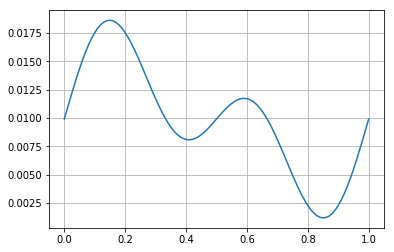

In [25]:
x = np.linspace(0, 1, 101)
y = 2+np.sin(2*np.pi*x)+np.sin(4*np.pi*x)

pdf = y/np.sum(y) # normalize , sum=1

plt.plot(x,pdf)
plt.grid(True)
plt.show()

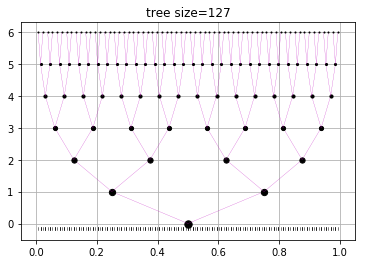

In [28]:
tree = be.Exploration_tree(1, 127)
tree.plot()

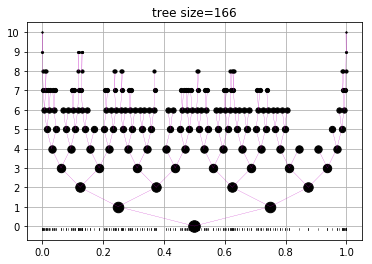

In [35]:
# adaption
batches = 100
batch_size = 1000

for i in range(batches):
    samples = np.random.choice(x, size = batch_size,p=pdf)
    for sample in samples:
        tree.search_nearest_node([sample])
    
    if i!=batches-1:
        tree.update()
    
tree.plot()


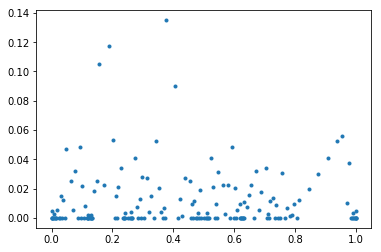

In [46]:
nodes = tree.get_nodes()
last_values = np.array(list(node.get_value() for node in nodes)).flatten()
points = np.array(list(node.get_location() for node in nodes)).flatten()

plt.plot(points, last_values, '.')
# plt.plot(last_values)
plt.show()

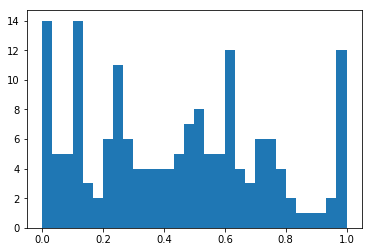

In [42]:
plt.hist(points, bins=30)
plt.show()